<a href="https://colab.research.google.com/github/1218muskan/DL-CV_IGDTUW/blob/main/TensorflowANN_FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

## Loading Dataset

https://keras.io/api/datasets/fashion_mnist/

In [4]:
(x_train, y_train), (x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

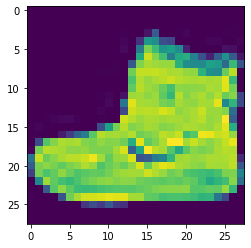

In [6]:
plt.imshow(x_train[0])
plt.show()

#Image of a boot

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

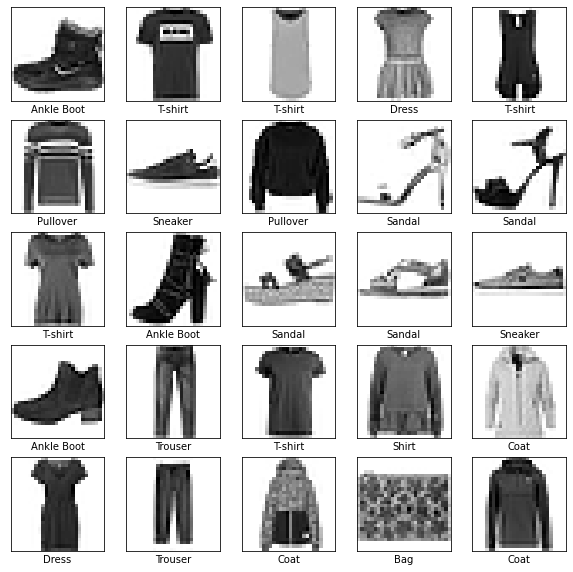

In [8]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

plt.figure(figsize = (10,10)) # 10x10 inches , dimension of whole graph
for i in range(25):
  plt.subplot(5, 5, i+1)      # 5 rows and 5 columns, i+1 -> index
  plt.xticks([])              # we don't want ticks on images           
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
  
plt.show()

## Data Pre-processing

In [9]:
# Normalization of Images
x_train, x_test = x_train / 255.0 , x_test / 255.0

Conv2D accepts a 4 dimension array... (for coloured images)<br>
eg:- (60000, 28, 28, 3) <br><br>


But our input matrix is of 3 dimesnion

In [10]:
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')

# Introducing a new axis (..., :- after 3 axis)

In [11]:
x_train.shape

(60000, 28, 28, 1)

## Building Model

In [12]:
# convert data into tensor object
# perform shuffling
# divide data into batches

train_df = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_df = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(10000).batch(32)
# 32 -> batch size, in each batch we will have 32 images

In [13]:
train_df 
# tensor object

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [14]:
# Inhreting the Model class that we have imported
class MyModel(Model):

  def __init__(self):                 # __init__ -> constructor , self -> like 'this' keyword
    super(MyModel, self).__init__()   # calling parent class constructor (Model class init)
    
    # Model Defn
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.hidden_layer = Dense(128, activation ='relu')
    self.output_layer = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.hidden_layer(x)
    x = self.output_layer(x)
    return x


Here, 1st layer is not the input layer.<br>
1st layer is convolutional layer which will perform some operations on our image.<br>
Flatten layer will be the input layer (with some 'n' no. of neurons)

In [15]:
model = MyModel()
# creating the object of class

In [16]:
model

**Few popular Loss Functions**

- Regression
   - MSE
   - MAE
   - Mean Squared Logaritmic Loss

- Binary Loss function
   - Binary Cross-Entropy
   - Hinge Loss
   - Squared Hinge Loss

- Multi-Class Categorical Loss function
   - Multi Class Cross Entropy
   - Sparse Categorical Cross Entropy
   - KL Divergence Loss

In [17]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

**Few popular Optimization Techniques**

- Gradient Descent
  - Batch Gradient Descent
  - Stochastic Gradient Descent
  - Mini Batch Gradient Descent

- Momentum
- AdaGrad
- AdaDelta
- Adam
- RMSProp

In [18]:
optimizer = tf.keras.optimizers.Adam()

In [19]:
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
test_loss = tf.keras.metrics.Mean(name = 'test_loss')

train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_acc')
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_acc')

In [24]:
# using Python Decorator

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images, training = True)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)        # trainable variables -> weights, bias
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_acc(labels, predictions)

In [25]:
@tf.function
def test_step(images, labels):
  predictions = model(images, training = False)
  loss = loss_object(labels, predictions)

  test_loss(loss)
  test_acc(labels, predictions)

In [28]:
epochs = 5
for epoch in range(epochs):

  train_loss.reset_states()
  train_acc.reset_states()
  test_loss.reset_states()
  test_acc.reset_states()
  
  for images, labels in train_df:
    train_step(images, labels)

  for images, labels in test_df:
    test_step(images, labels)

  print("Epoch : {}, TrainLoss : {}, TrainAccuracy : {}, TestLoss : {}, TestAccuracy : {}".format(epoch,
                                                                                   train_loss.result(),
                                                                                   train_acc.result(),
                                                                                   test_loss.result(),
                                                                                   test_acc.result()))

Epoch : 0, TrainLoss : 0.110188327729702, TrainAccuracy : 0.9589333534240723, TestLoss : 0.2971610724925995, TestAccuracy : 0.90420001745224
Epoch : 1, TrainLoss : 0.08365193009376526, TrainAccuracy : 0.9700833559036255, TestLoss : 0.31391867995262146, TestAccuracy : 0.9089000225067139
Epoch : 2, TrainLoss : 0.06383300572633743, TrainAccuracy : 0.9774166941642761, TestLoss : 0.3608764410018921, TestAccuracy : 0.9082000255584717
Epoch : 3, TrainLoss : 0.0490354560315609, TrainAccuracy : 0.9821833372116089, TestLoss : 0.39345255494117737, TestAccuracy : 0.9056000113487244
Epoch : 4, TrainLoss : 0.03718291595578194, TrainAccuracy : 0.9867333173751831, TestLoss : 0.4295646548271179, TestAccuracy : 0.9082000255584717
